#TelecomX_LATAM_1

#📌 Extracción

Extracción de datos

Descripción

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

¿Qué debes hacer?

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [1]:
import pandas as pd

# Cargar los datos directamente desde la API utilizando Python
raw_url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Convertir los datos a un DataFrame de Pandas
    df = pd.read_json(raw_url)
    print(f"DataFrame cargado exitosamente. Filas: {len(df)}, Columnas: {len(df.columns)}")
except Exception as e:
    print(f"Error al cargar el JSON: {e}")
    print("Verifica la URL y tu conexión a internet.")

DataFrame cargado exitosamente. Filas: 7267, Columnas: 6


#🔧 Transformación

Conozce el conjunto de datos

Descripción

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

In [ ]:
# Exploración de las columnas del dataset
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(df.columns.tolist())
print("\n" + "="*50 + "\n")
print(df.head())
print("\n" + "="*50 + "\n")

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


   customerID Churn                                                                                      customer                                            phone                                                                                                                                                                           internet                                                                                                                                           account
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}   {'PhoneService': 'Yes', 'MultipleLines': 'No'}           {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}              {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'C

In [ ]:
# Verificación de los tipos de datos de las columnas del dataset
print(df.dtypes)

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

Columnas  más relevantes para el análisis de evasión

**Churn**: Esta columna te dice directamente si un cliente se fue ("Yes") o se quedó ("No").

**Internet**: Aunque se muestra como un diccionario, esta columna agrupa toda la información relacionada con los servicios de internet del cliente.

**Account**: Similar a internet, esta columna es un diccionario que contiene información vital sobre la relación contractual y financiera del cliente con la empresa.

Comprobación de incoherencias en los datos

Descripción

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [ ]:
# Verificación de valores ausentes
print("1. Verificación de valores ausentes:")
print(df[['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']].isnull().sum())
print("\n" + "="*50 + "\n")

1. Verificación de valores ausentes:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64




In [ ]:
# Verificación de valores duplicados
print("2. Verificación de valores duplicados:")
print(df[['customerID', 'Churn']].duplicated().sum())
print("\n" + "="*50 + "\n")
# Nota: La función .duplicated() no puede procesar directamente columnas que contienen diccionarios (como 'customer', 'phone', 'internet', 'account') sin causar un error.
# Por lo tanto, aquí verificamos duplicados basados en columnas que típicamente no contienen estructuras anidadas complejas.
# Para un chequeo de duplicados en todas las columnas conceptuale primero se necesitaría normalizar (desanidar) las columnas con diccionarios.

2. Verificación de valores duplicados:
0




In [ ]:
# Verificación de valores con errores de formato
print("3. Verificación de valores con errores de formato:")
print(df[['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']].dtypes)
print("\n" + "="*50 + "\n")
# Nota: Esto nos da una idea general de los tipos de datos.
# Errores de formato más específicos dentro de los datos anidados se verán mejor después de la normalización.

3. Verificación de valores con errores de formato:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object




In [ ]:
# Verificación de valores con inconsistencias en las categorías
print("4. Verificación de valores con inconsistencias en las categorías:")
print(df['Churn'].unique())
print("\n" + "="*50 + "\n")
# Nota: El método .unique() está diseñado para operar sobre una Serie de Pandas (una sola columna) no sobre un DataFrame completo o una selección de múltiples columnas a la vez para este propósito.
# Por lo tanto, aquí verificamos inconsistencias en categorías enfocándonos en columnas individuales que se espera sean categóricas, como 'Churn'.
# Para las columnas que contienen diccionarios ('customer', 'phone', 'internet', 'account'), aplicar .unique() directamente no es útil para identificar inconsistencias de categorías en su contenido anidado y podría no funcionar como se espera.
# La revisión de categorías dentro de esos datos anidados se realiza de manera efectiva después de la normalización (desanidado), cuando cada pieza de información del diccionario se convierte en su propia columna.

4. Verificación de valores con inconsistencias en las categorías:
['No' 'Yes' '']




Manejo de inconsistencias

Descripción

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [2]:
#---I---

# Contar las filas con strings vacíos en la columna 'Churn'
filas_con_problema = (df['Churn'] == '').sum()
print(f"Se encontraron {filas_con_problema} filas con valores vacíos en la columna 'Churn'.")

# Crear un nuevo DataFrame 'df_limpio' que excluye esas filas
df_limpio = df[df['Churn'] != ''].copy()
print("Se eliminaron las filas problemáticas.")

# Verificar la limpieza en el nuevo DataFrame
print("\nVerificación en el nuevo DataFrame 'df_limpio':")
print(f"Tamaño original: {df.shape[0]} filas | Tamaño nuevo: {df_limpio.shape[0]} filas")
print("Valores únicos en 'Churn' después de la limpieza:")
print(df_limpio['Churn'].unique())
print("\n" + "="*50 + "\n")

# Nota: Este código identifica y elimina las filas donde la columna 'Churn' contiene un string vacío ('').
# Se crea un nuevo DataFrame llamado 'df_limpio' para trabajar a partir de ahora, asegurando que la variable objetivo solo contenga los valores 'Yes' y 'No'.

Se encontraron 224 filas con valores vacíos en la columna 'Churn'.
Se eliminaron las filas problemáticas.

Verificación en el nuevo DataFrame 'df_limpio':
Tamaño original: 7267 filas | Tamaño nuevo: 7043 filas
Valores únicos en 'Churn' después de la limpieza:
['No' 'Yes']




Columna de cuentas diarias

Descripción

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [3]:
#---II---

# Crear la columna 'Cuentas_Diarias'
df_limpio['Cuentas_Diarias'] = df_limpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)
print("Se ha creado la columna 'Cuentas_Diarias'.")

# Verificar la nueva columna
print("\nVerificación de la nueva columna:")
pd.set_option('display.max_colwidth', None)
print(df_limpio[['customerID', 'account', 'Cuentas_Diarias']].head())
print("\n" + "="*50 + "\n")

# Nota: Este código crea la columna 'Cuentas_Diarias' en 'df_limpio'.
# El cálculo divide el cobro mensual (extraído de 'account') por 30, asumiendo un mes estándar.

Se ha creado la columna 'Cuentas_Diarias'.

Verificación de la nueva columna:
   customerID  \
0  0002-ORFBO   
1  0003-MKNFE   
2  0004-TLHLJ   
3  0011-IGKFF   
4  0013-EXCHZ   

                                                                                                                                            account  \
0              {'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}   
1         {'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 59.9, 'Total': '542.4'}}   
2   {'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 73.9, 'Total': '280.85'}}   
3  {'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': {'Monthly': 98.0, 'Total': '1237.85'}}   
4        {'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes

Estandarización y transformación de datos (opcional)

Descripción

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [4]:
#---III---

# Convertir la columna 'Churn' a formato binario (1 para 'Yes', 0 para 'No')
df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})
print("Se ha convertido la columna 'Churn' a formato binario.")

# Renombrar las columnas a español para mayor claridad
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
df_limpio = df_limpio.rename(columns=mapeo_columnas)
print("Se han renombrado las columnas del DataFrame.")

# Verificar las transformaciones
print("\nVerificación de las transformaciones:")
print(df_limpio.head())
print("\n" + "="*50 + "\n")

# Nota: Este código estandariza el DataFrame 'df_limpio' de dos maneras principales.
# La columna 'Evasion' se convierte a formato binario (1/0) y las columnas se renombran a español.

Se ha convertido la columna 'Churn' a formato binario.
Se han renombrado las columnas del DataFrame.

Verificación de las transformaciones:
   ID_Cliente  Evasion  \
0  0002-ORFBO        0   
1  0003-MKNFE        0   
2  0004-TLHLJ        1   
3  0011-IGKFF        1   
4  0013-EXCHZ        1   

                                                                                        Cliente  \
0  {'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}   
1      {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}   
2      {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}   
3    {'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 13}   
4   {'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 3}   

                               Servicio_Telefonico  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   


#📊 Carga y análisis

Análisis Descriptivo

Descripción

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [5]:
#---IV---

# Calcular estadísticas descriptivas para las columnas numéricas
print("Análisis Descriptivo de Columnas Numéricas:")
print(df_limpio.describe())
print("\n" + "="*50 + "\n")

# Calcular estadísticas descriptivas para las columnas categóricas (object)
print("Análisis Descriptivo de Columnas Categóricas:")
print(df_limpio.describe(include=['object']))
print("\n" + "="*50 + "\n")

# Nota: Este código realiza un análisis descriptivo completo usando el método .describe().
# Se aplica primero a las columnas numéricas (mostrando media, mediana, desviación estándar, etc.) y luego a las columnas categóricas (mostrando conteo, valores únicos y frecuencia).

Análisis Descriptivo de Columnas Numéricas:
           Evasion  Costo_Diario
count  7043.000000   7043.000000
mean      0.265370      2.158723
std       0.441561      1.003002
min       0.000000      0.608333
25%       0.000000      1.183333
50%       0.000000      2.345000
75%       1.000000      2.995000
max       1.000000      3.958333


Análisis Descriptivo de Columnas Categóricas:
        ID_Cliente  \
count         7043   
unique        7043   
top     9995-HOTOH   
freq             1   

                                                                                         Cliente  \
count                                                                                       7043   
unique                                                                                       891   
top     {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 1}   
freq                                                                                         215   


Distribución de evasión

Descripción

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

Análisis de la Distribución de Evasión:
Evasion
0    5174
1    1869
Name: count, dtype: int64




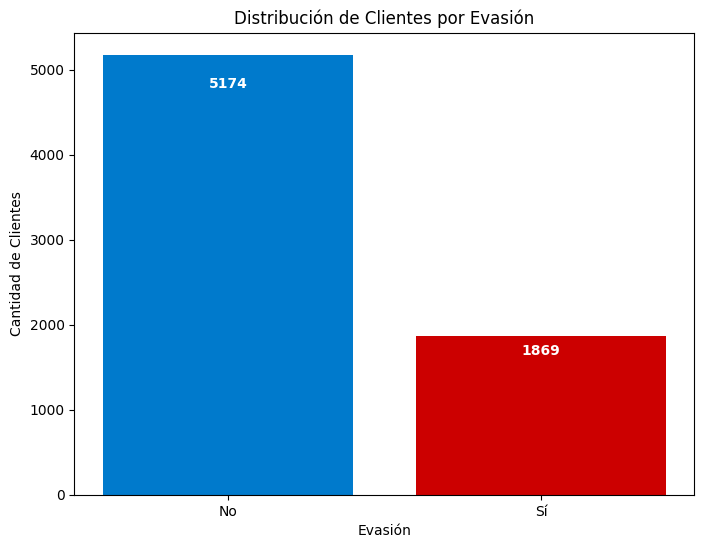

In [6]:
#---V---

# Importar las librerías necesarias
import matplotlib.pyplot as plt

# Calcular la distribución de la variable 'Evasion'
distribucion_evasion = df_limpio['Evasion'].value_counts()
print("Análisis de la Distribución de Evasión:")
print(distribucion_evasion)
print("\n" + "="*50 + "\n")

# Crear el gráfico de barras para visualizar la distribución
etiquetas = ['No', 'Sí']
valores = [distribucion_evasion.get(0, 0), distribucion_evasion.get(1, 0)]
plt.figure(figsize=(8, 6))
bars = plt.bar(etiquetas, valores, color=['#007ACC', '#CC0000'])
plt.title('Distribución de Clientes por Evasión')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Evasión')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval - (yval * 0.05), int(yval), va='top', ha='center', color='white', fontweight='bold')
plt.show()

# Nota: Este código primero cuenta el número de clientes para cada categoría de la variable 'Evasion' (0 y 1).
# Luego, genera un gráfico de barras para visualizar claramente la proporción de clientes que permanecieron frente a los que no.

Recuento de evasión por variables categóricas

Descripción

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

Se eliminaron las filas problemáticas.
Se ha creado la columna 'Cuentas_Diarias'.
Se ha convertido la columna 'Churn' a formato binario.
Se han renombrado las columnas del DataFrame.


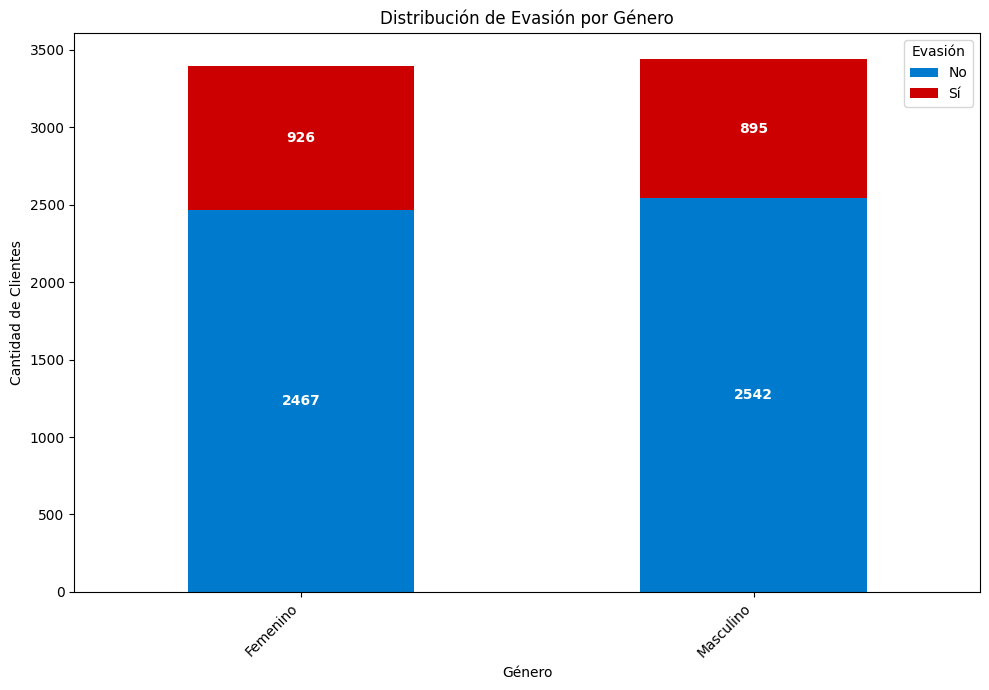

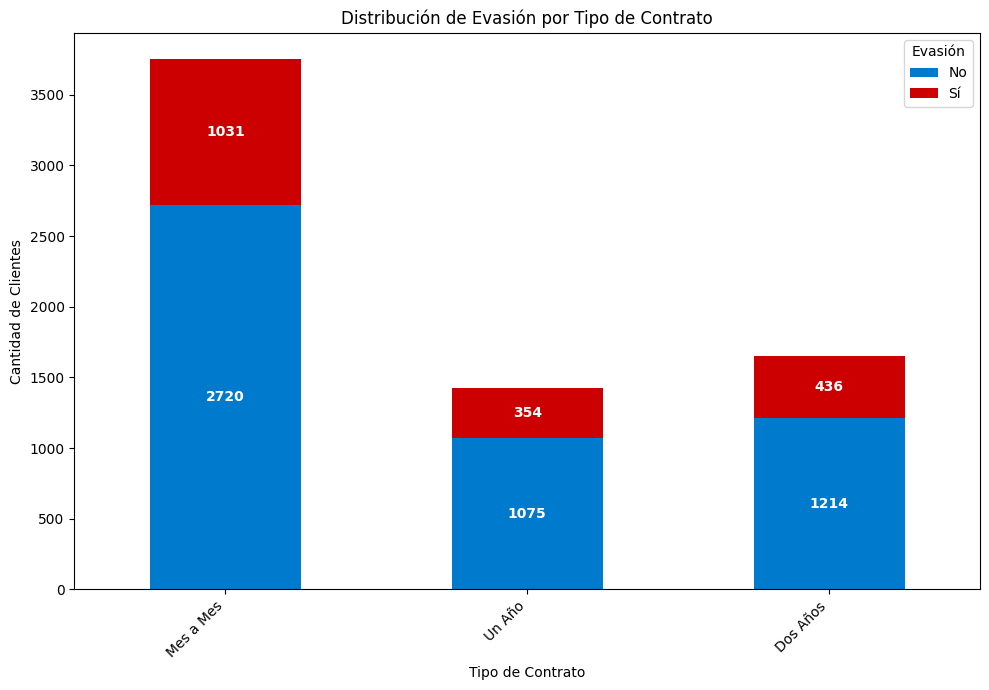

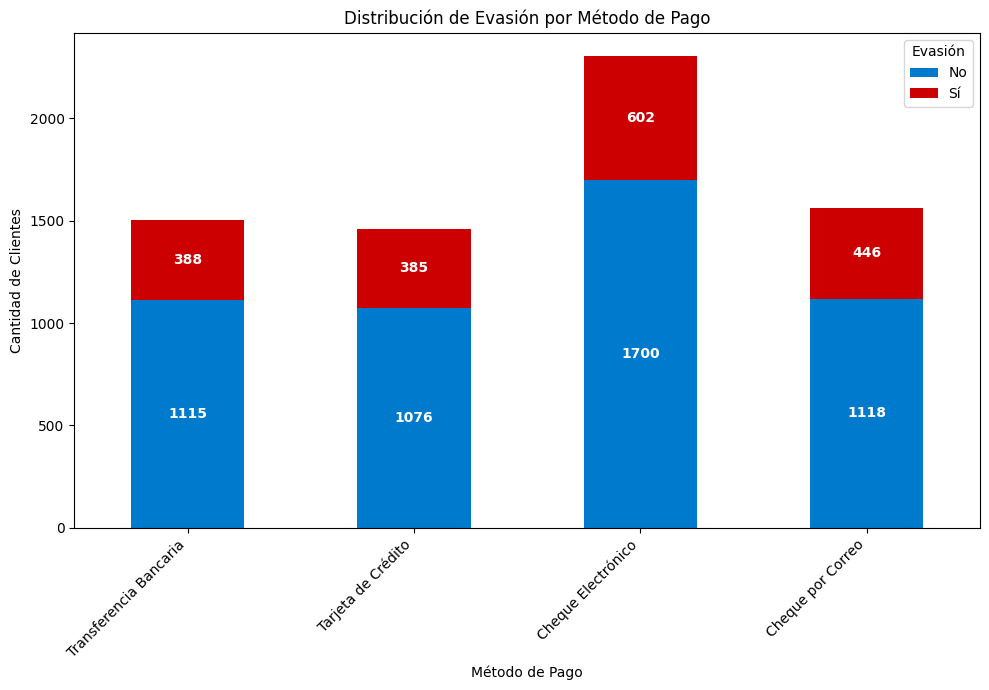

In [7]:
#---VI---

# Crear un nuevo DataFrame 'df_limpio'
df_limpio = df[df['Churn'] != ''].copy()
print("Se eliminaron las filas problemáticas.")

# Crear la columna 'Cuentas_Diarias'
df_limpio['Cuentas_Diarias'] = df_limpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)
print("Se ha creado la columna 'Cuentas_Diarias'.")

# Convertir la columna 'Churn' a formato binario (1 para 'Yes', 0 para 'No')
df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})
print("Se ha convertido la columna 'Churn' a formato binario.")

# Renombrar las columnas a español para mayor claridad
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
df_limpio = df_limpio.rename(columns=mapeo_columnas)
print("Se han renombrado las columnas del DataFrame.")

#---Normalización de Datos Anidados---

# Normalizar las columnas con diccionarios
df_cliente_norm = pd.json_normalize(df_limpio['Cliente'])
df_internet_norm = pd.json_normalize(df_limpio['Servicio_Internet'])
df_cuenta_norm = pd.json_normalize(df_limpio['Cuenta'])

# Unir todas las partes normalizadas en un solo DataFrame final
df_final = df_limpio[['ID_Cliente', 'Evasion', 'Costo_Diario']].copy()
df_final = pd.concat([df_final, df_cliente_norm, df_internet_norm, df_cuenta_norm], axis=1)

#---Análisis y Visualización de Evasión por Categoría---

# Lista de variables categóricas a analizar
traducciones = {
    'Female': 'Femenino',
    'Male': 'Masculino',
    'Month-to-month': 'Mes a Mes',
    'One year': 'Un Año',
    'Two year': 'Dos Años',
    'Electronic check': 'Cheque Electrónico',
    'Mailed check': 'Cheque por Correo',
    'Bank transfer (automatic)': 'Transferencia Bancaria',
    'Credit card (automatic)': 'Tarjeta de Crédito'
}
variables_a_analizar = ['gender', 'Contract', 'PaymentMethod']
nombres_en_espanol = ['Género', 'Tipo de Contrato', 'Método de Pago']

# Nombres en español para los títulos de los gráficos
nombres_en_espanol = ['Género', 'Tipo de Contrato', 'Método de Pago']

# Desarrollo del gráfico
for i, variable in enumerate(variables_a_analizar):

    # Crear una tabla de contingencia (crosstab)
    crosstab = pd.crosstab(df_final[variable], df_final['Evasion'])

    # Traducir el índice del crosstab (las etiquetas del eje X)
    crosstab.rename(index=traducciones, inplace=True)

    # Crear el gráfico de barras apilado
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#007ACC', '#CC0000'])

    # Añadir el número sobre cada segmento de la barra
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d', color='white', fontweight='bold')

    # Configurar el gráfico
    plt.title(f'Distribución de Evasión por {nombres_en_espanol[i]}')
    plt.ylabel('Cantidad de Clientes')
    plt.xlabel(nombres_en_espanol[i])
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Evasión', labels=['No', 'Sí'])

    # Ajustar el layout y mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Nota: Este código primero realiza un paso crucial de normalización para "descomprimir" los datos anidados (acción que se hará en VII, VIII y en IX también).
# Esto convierte las columnas 'Cliente', 'Servicio_Internet' y 'Cuenta' que son diccionarios en columnas individuales y utilizables.
# Luego, para cada variable categórica clave, se genera un gráfico de barras apilado que muestra visualmente cuántos clientes abandonaron el servicio y cuántos no, dentro de cada categoría.

Conteo de evasión por variables numéricas

Descripción

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

Se eliminaron las filas problemáticas.
Se ha creado la columna 'Cuentas_Diarias'.
Se ha convertido la columna 'Churn' a formato binario.
Se han renombrado las columnas del DataFrame.


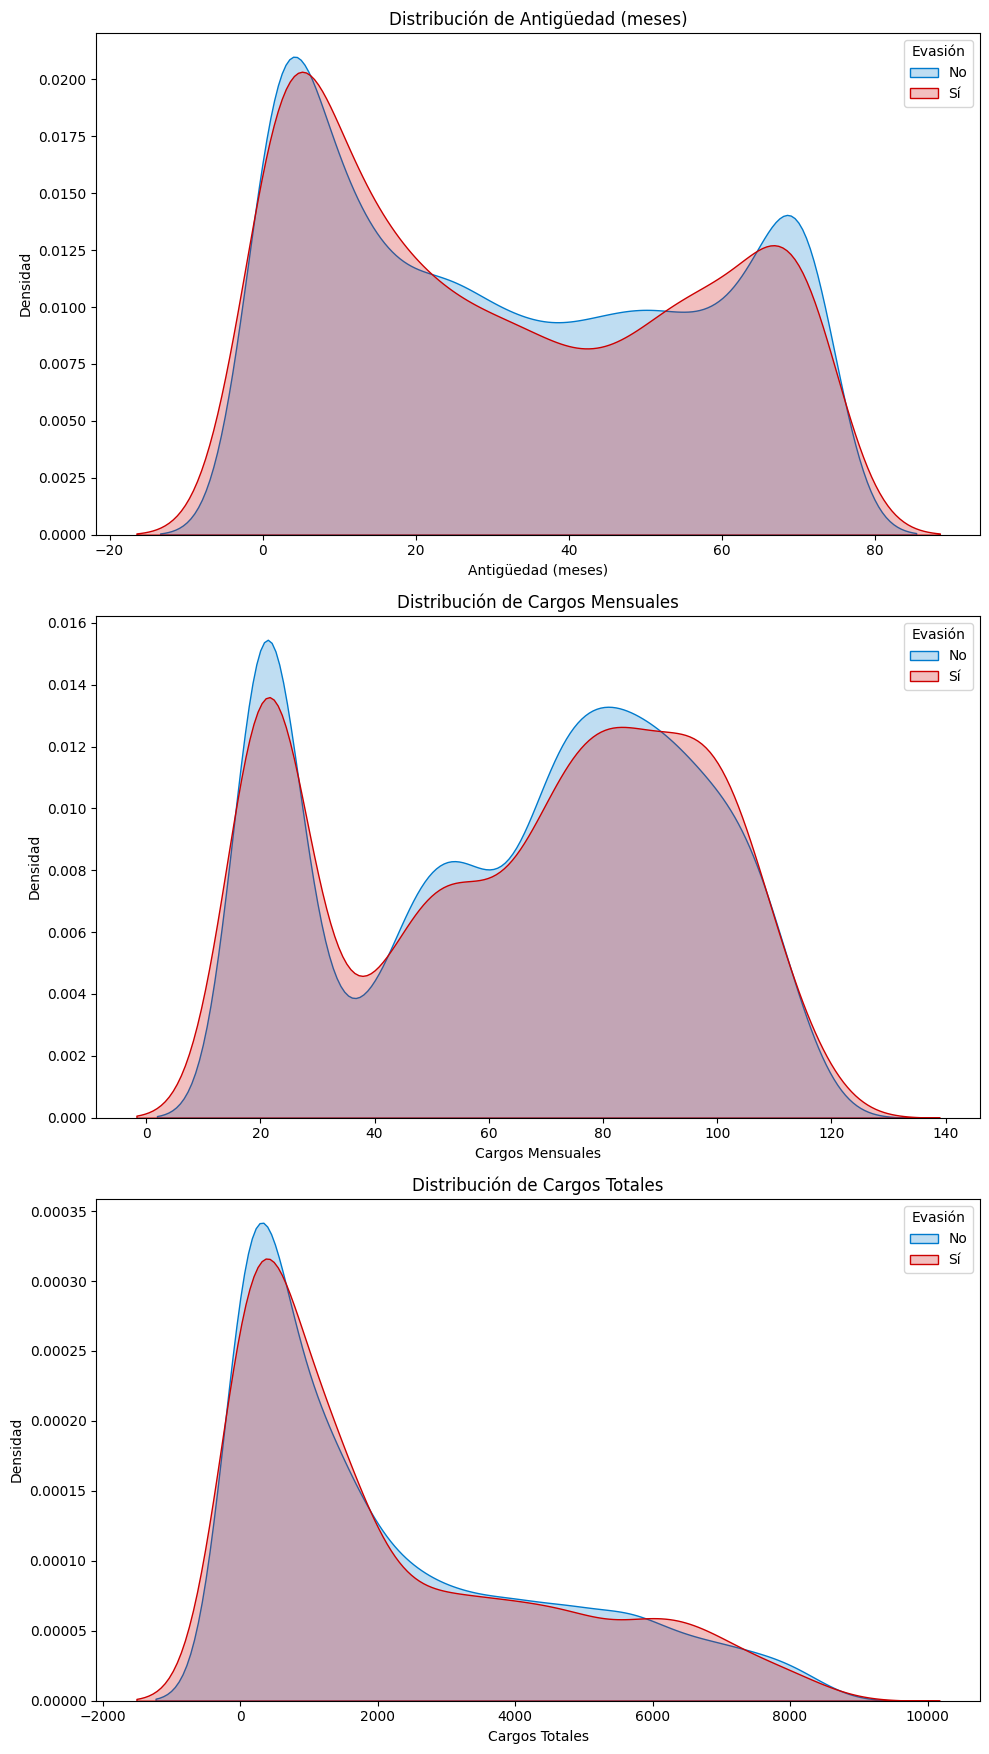

In [8]:
#---VII---

# Importar las librerías necesarias
import seaborn as sns

# Crear un nuevo DataFrame 'df_limpio'
df_limpio = df[df['Churn'] != ''].copy()
print("Se eliminaron las filas problemáticas.")

# Crear la columna 'Cuentas_Diarias'
df_limpio['Cuentas_Diarias'] = df_limpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)
print("Se ha creado la columna 'Cuentas_Diarias'.")

# Convertir la columna 'Churn' a formato binario (1 para 'Yes', 0 para 'No')
df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})
print("Se ha convertido la columna 'Churn' a formato binario.")

# Renombrar las columnas a español para mayor claridad
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
df_limpio = df_limpio.rename(columns=mapeo_columnas)
print("Se han renombrado las columnas del DataFrame.")

#---Normalización de Datos Anidados---

# Normalizar las columnas con diccionarios
df_cliente_norm = pd.json_normalize(df_limpio['Cliente'])
df_internet_norm = pd.json_normalize(df_limpio['Servicio_Internet'])
df_cuenta_norm = pd.json_normalize(df_limpio['Cuenta'])

# Unir todas las partes normalizadas en un solo DataFrame final
df_final = df_limpio[['ID_Cliente', 'Evasion', 'Costo_Diario']].copy()
df_final = pd.concat([df_final, df_cliente_norm, df_internet_norm, df_cuenta_norm], axis=1)

#---Corrección de Tipos de Datos Numéricos---

# La columna 'Charges.Total' puede contener espacios y necesita ser convertida a numérica
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)

#---Análisis y Visualización de Evasión por Variable Numérica---

# Lista de variables numéricas a analizar
variables_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Nombres en español para los títulos de los gráficos
nombres_en_espanol_num = ['Antigüedad (meses)', 'Cargos Mensuales', 'Cargos Totales']

# Crear una figura con múltiples subplots para asegurar un tamaño consistente
fig, axes = plt.subplots(nrows=len(variables_numericas), ncols=1, figsize=(10, 6 * len(variables_numericas)))

# Desarrollo del gráfico
for i, variable in enumerate(variables_numericas):

    # Seleccionar el subplot (ax) correspondiente para cada gráfico
    ax = axes[i]

    # Graficar la distribución para clientes que no hicieron evasión (Evasion = 0)
    sns.kdeplot(df_final[df_final['Evasion'] == 0][variable], label='No', fill=True, color='#007ACC', ax=ax)

    # Graficar la distribución para clientes que sí hicieron evasión (Evasion = 1)
    sns.kdeplot(df_final[df_final['Evasion'] == 1][variable], label='Sí', fill=True, color='#CC0000', ax=ax)

    # Configurar el gráfico
    ax.set_title(f'Distribución de {nombres_en_espanol_num[i]}')
    ax.set_xlabel(nombres_en_espanol_num[i])
    ax.set_ylabel('Densidad')
    ax.legend(title='Evasión')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Nota: Este código primero corrige el tipo de dato de la columna 'Charges.Total' para asegurar que sea numérica.
# Luego, para cada variable numérica clave, genera un gráfico de densidad (KDE plot) que permite comparar visualmente las distribuciones entre los clientes que abandonaron el servicio y los que no.

#📍¡Extra!

Análisis de correlación entre variables

Descripción

Esta actividad es un extra, por lo tanto es OPCIONAL.

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

- La relación entre la cuenta diaria y la evasión.
- Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

**La relación entre la cuenta diaria y la evasión**

Se eliminaron las filas problemáticas.
Se ha creado la columna 'Cuentas_Diarias'.
Se ha convertido la columna 'Churn' a formato binario.
Se han renombrado las columnas del DataFrame.

La correlación entre el Costo Diario y la Evasión es: 0.1934


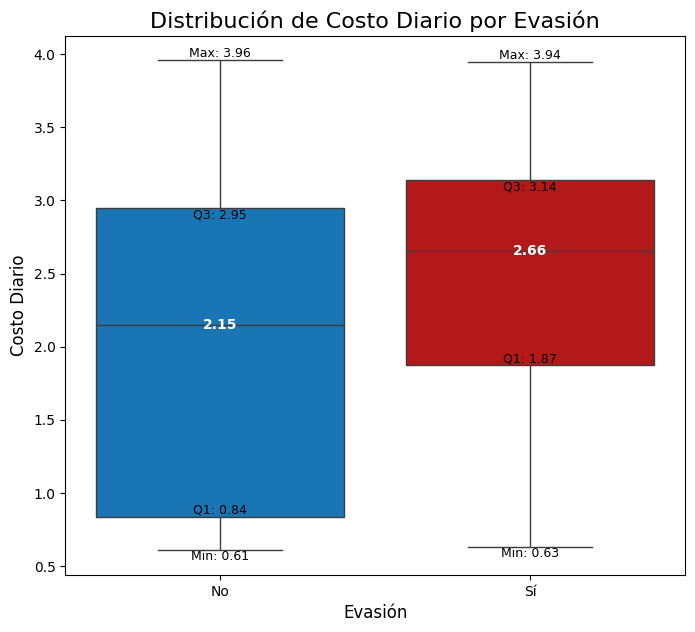

In [9]:
#---VIII----

# Crear un nuevo DataFrame 'df_limpio'
df_limpio = df[df['Churn'] != ''].copy()
print("Se eliminaron las filas problemáticas.")

# Crear la columna 'Cuentas_Diarias'
df_limpio['Cuentas_Diarias'] = df_limpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)
print("Se ha creado la columna 'Cuentas_Diarias'.")

# Convertir la columna 'Churn' a formato binario (1 para 'Yes', 0 para 'No')
df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})
print("Se ha convertido la columna 'Churn' a formato binario.")

# Renombrar las columnas a español para mayor claridad
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
df_limpio = df_limpio.rename(columns=mapeo_columnas)
print("Se han renombrado las columnas del DataFrame.")

#---Normalización de Datos Anidados---

# Normalizar las columnas con diccionarios
df_cliente_norm = pd.json_normalize(df_limpio['Cliente'])
df_internet_norm = pd.json_normalize(df_limpio['Servicio_Internet'])
df_cuenta_norm = pd.json_normalize(df_limpio['Cuenta'])

# Unir todas las partes normalizadas en un solo DataFrame final
df_final = df_limpio[['ID_Cliente', 'Evasion', 'Costo_Diario']].copy()
df_final = pd.concat([df_final, df_cliente_norm, df_internet_norm, df_cuenta_norm], axis=1)

#---Corrección de Tipos de Datos Numéricos---

# La columna 'Charges.Total' puede contener espacios y necesita ser convertida a numérica
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)

#---Correlación entre Costo Diario y Evasión---

# Calcular el coeficiente de correlación de Pearson
correlacion = df_final['Costo_Diario'].corr(df_final['Evasion'])
print(f"\nLa correlación entre el Costo Diario y la Evasión es: {correlacion:.4f}")

# Visualizar la relación con un gráfico de cajas (boxplot)
plt.figure(figsize=(8, 7))
ax = sns.boxplot(x='Evasion', y='Costo_Diario', data=df_final, hue='Evasion', palette=['#007ACC', '#CC0000'], legend=False)

# Desarrollo del gráfico
for i in [0, 1]:

    # Seleccionar el subconjunto de datos para la categoría actual
    subset = df_final[df_final['Evasion'] == i]

    # Calcular estadísticas clave Q1, Q2, Q3
    q1 = subset['Costo_Diario'].quantile(0.25)
    q3 = subset['Costo_Diario'].quantile(0.75)
    iqr = q3 - q1
    median = subset['Costo_Diario'].median()

    # Calcular los límites de los bigotes (whiskers)
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Encontrar el valor del cuartil Q1 y del cuartil Q2 real dentro de los límites de las barras
    q1 = subset['Costo_Diario'].quantile(0.25)
    median = subset['Costo_Diario'].median()
    q3 = subset['Costo_Diario'].quantile(0.75)

    # Encontrar el valor mínimo y máximo real dentro de los límites de los bigotes
    valor_minimo = subset['Costo_Diario'][subset['Costo_Diario'] >= limite_inferior].min()
    valor_maximo = subset['Costo_Diario'][subset['Costo_Diario'] <= limite_superior].max()

    # Añadir texto para la mediana Q2 (dentro de la caja, en blanco)
    ax.text(i, median, f'{median:.2f}', ha='center', va='center', color='white', fontweight='bold', fontsize=10)

    # Añadir texto para Q1, Q2, el mínimo y máximo (fuera de la caja, en negro)
    ax.text(i, valor_minimo, f'Min: {valor_minimo:.2f}', ha='center', va='top', color='black', fontsize=9)
    ax.text(i, valor_maximo, f'Max: {valor_maximo:.2f}', ha='center', va='bottom', color='black', fontsize=9)
    ax.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=9)
    ax.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', verticalalignment='top', color='black', fontsize=9)

# Configurar el gráfico
ax.set_title('Distribución de Costo Diario por Evasión', fontsize=16)
ax.set_ylabel('Costo Diario', fontsize=12)
ax.set_xlabel('Evasión', fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Sí'])

# Mostrar el gráfico
plt.show()

# Nota: Este código analiza la relación entre el costo diario y la evasión de dos formas.
# Primero, calcula el coeficiente de correlación.
# Segundo, luego usa un gráfico de cajas (boxplot) para comparar visualmente las distribuciones de costo.

**Cómo la cantidad de servicios contratados afecta la probabilidad de churn**

Se eliminaron las filas problemáticas.
Se ha creado la columna 'Cuentas_Diarias'.
Se ha convertido la columna 'Churn' a formato binario.
Se han renombrado las columnas del DataFrame.
Se ha creado la columna 'Cantidad_Servicios'.


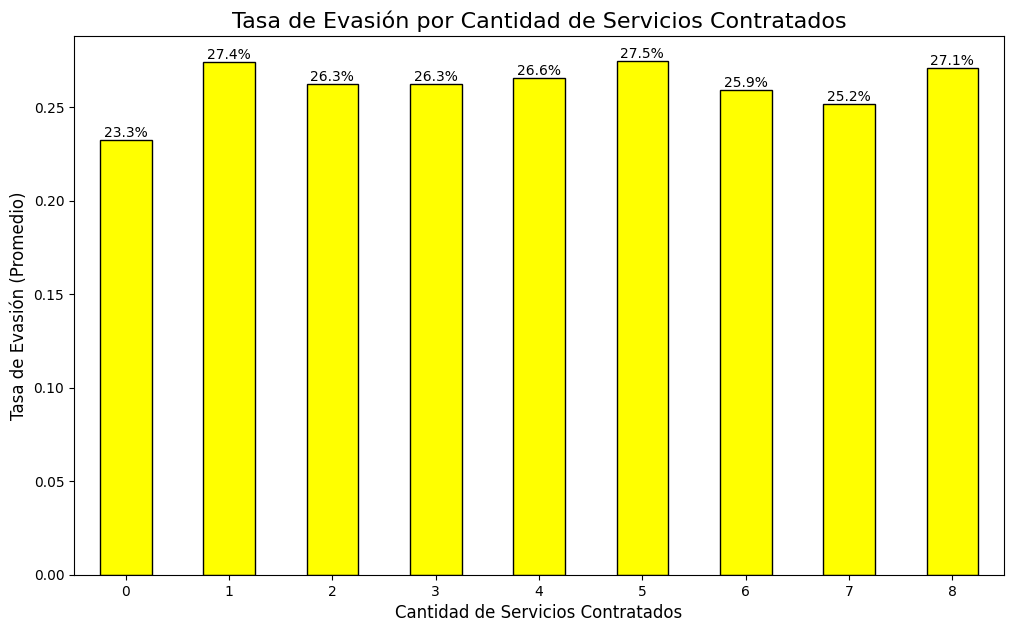

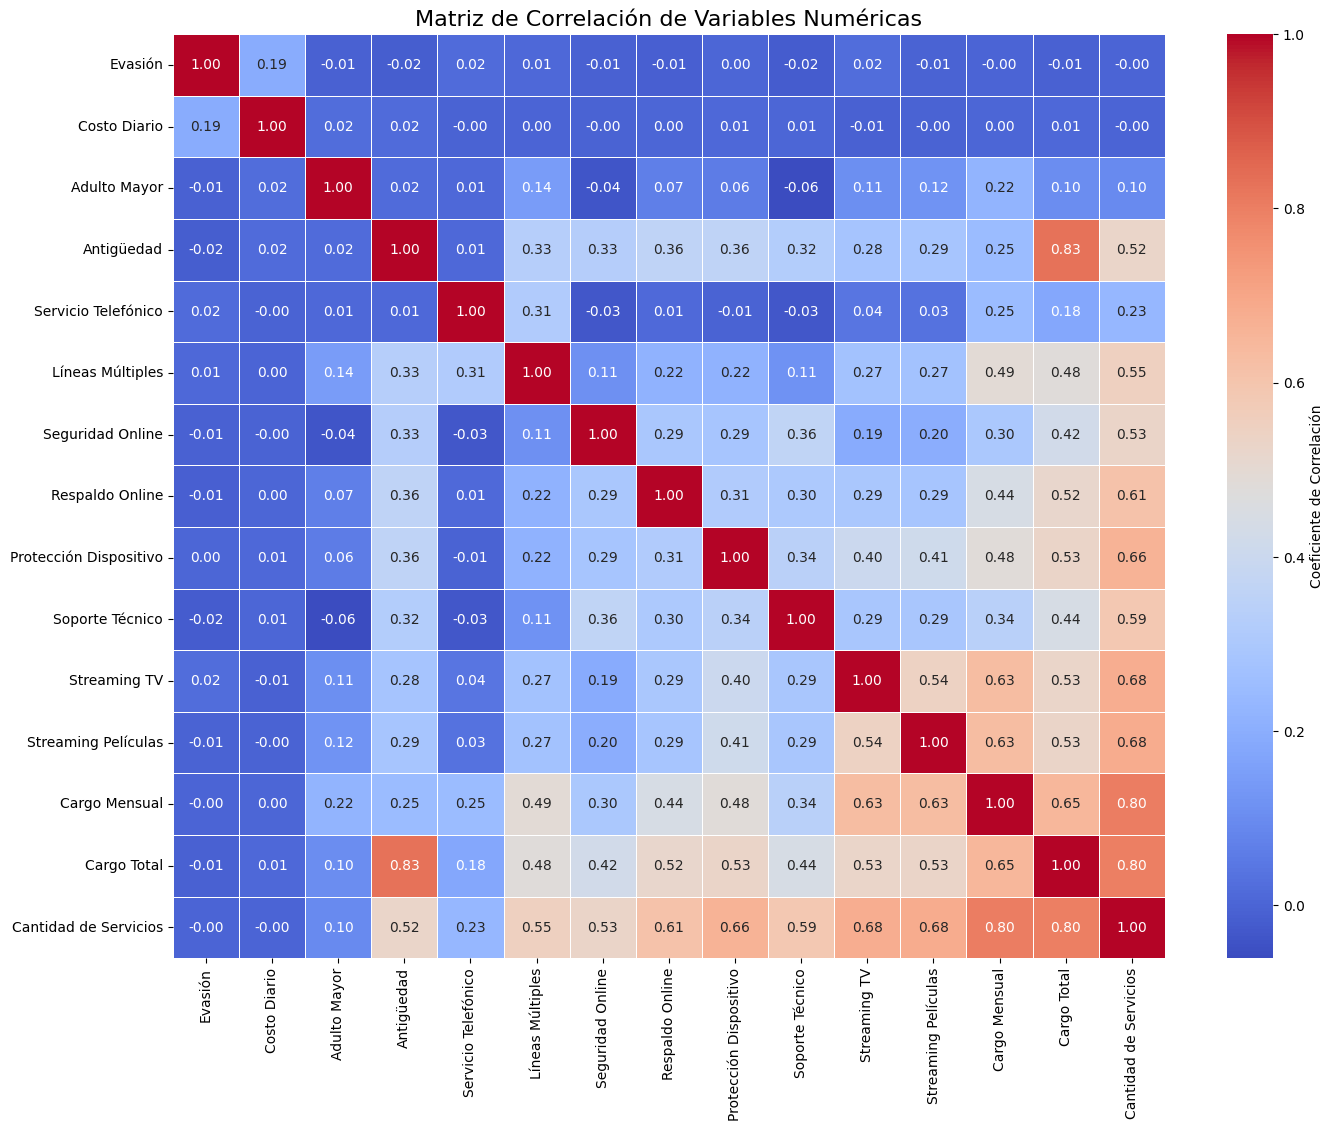

In [10]:
#---IX----

# Crear un nuevo DataFrame 'df_limpio'
df_limpio = df[df['Churn'] != ''].copy()
print("Se eliminaron las filas problemáticas.")

# Crear la columna 'Cuentas_Diarias'
df_limpio['Cuentas_Diarias'] = df_limpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)
print("Se ha creado la columna 'Cuentas_Diarias'.")

# Convertir la columna 'Churn' a formato binario (1 para 'Yes', 0 para 'No')
df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})
print("Se ha convertido la columna 'Churn' a formato binario.")

# Renombrar las columnas a español para mayor claridad
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
df_limpio = df_limpio.rename(columns=mapeo_columnas)
print("Se han renombrado las columnas del DataFrame.")

#---Normalización de Datos Anidados---

# Normalizar las columnas con diccionarios
df_cliente_norm = pd.json_normalize(df_limpio['Cliente'])
df_telefono_norm = pd.json_normalize(df_limpio['Servicio_Telefonico'])
df_internet_norm = pd.json_normalize(df_limpio['Servicio_Internet'])
df_cuenta_norm = pd.json_normalize(df_limpio['Cuenta'])

# Unir todas las partes normalizadas en un solo DataFrame final
df_final = df_limpio[['ID_Cliente', 'Evasion', 'Costo_Diario']].copy()
df_final = pd.concat([df_final, df_cliente_norm, df_telefono_norm, df_internet_norm, df_cuenta_norm], axis=1)

#---Corrección de Tipos de Datos Numéricos---

# La columna 'Charges.Total' puede contener espacios y necesita ser convertida a numérica
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)

#---Ingeniería de Características: Conteo de Servicios---

# Lista de columnas que representan un servicio
columnas_servicios = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convertir 1 para 'Yes' y cualquier otro valor a 0 para 'No'
for col in columnas_servicios:
    df_final[col] = df_final[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Crear la columna 'Cantidad_Servicios' sumando los servicios
df_final['Cantidad_Servicios'] = df_final[columnas_servicios].sum(axis=1)
print("Se ha creado la columna 'Cantidad_Servicios'.")

#---Análisis de Evasión por Cantidad de Servicios Contratados---

# Calcular la tasa de evasión para cada cantidad de servicios
tasa_evasion_por_servicios = df_final.groupby('Cantidad_Servicios')['Evasion'].mean()

# Desarrollo del gráfico
plt.figure(figsize=(12, 7))
ax = tasa_evasion_por_servicios.plot(kind='bar', color='yellow', edgecolor='black')

# Añadir el porcentaje sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Configurar el gráfico
ax.set_title('Tasa de Evasión por Cantidad de Servicios Contratados', fontsize=16)
ax.set_ylabel('Tasa de Evasión (Promedio)', fontsize=12)
ax.set_xlabel('Cantidad de Servicios Contratados', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Mostrar el gráfico
plt.show()

#---Análisis de Correlación General---

# Seleccionar solo las columnas numéricas para el análisis de correlación
df_numerico = df_final.select_dtypes(include=['number'])

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Desarrollo del gráfico
plt.figure(figsize=(16, 12))

# Crear un diccionario para traducir los nombres de las columnas y filas al español
traduccion_numericos = {
    'Evasion': 'Evasión',
    'Costo_Diario': 'Costo Diario',
    'SeniorCitizen': 'Adulto Mayor',
    'tenure': 'Antigüedad',
    'PhoneService': 'Servicio Telefónico',
    'MultipleLines': 'Líneas Múltiples',
    'OnlineSecurity': 'Seguridad Online',
    'OnlineBackup': 'Respaldo Online',
    'DeviceProtection': 'Protección Dispositivo',
    'TechSupport': 'Soporte Técnico',
    'StreamingTV': 'Streaming TV',
    'StreamingMovies': 'Streaming Películas',
    'Charges.Monthly': 'Cargo Mensual',
    'Charges.Total': 'Cargo Total',
    'Cantidad_Servicios': 'Cantidad de Servicios'
}

# Renombrar las columnas y filas al español de la matriz de correlación
matriz_correlacion_traducida = matriz_correlacion.rename(columns=traduccion_numericos, index=traduccion_numericos)
ax = sns.heatmap(matriz_correlacion_traducida, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5,
                 cbar_kws={'label': 'Coeficiente de Correlación'})

# Configurar el gráfico
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)

# Mostrar el gráfico
plt.show()

# Nota: Este código analiza la relación entre la tasa de evasión y cantidad servicios contratados de dos formas.
# Primero, incluyendo un gráfico de barras sobre la tasa de evasión por cantidad de servicios.
# Segundo, una matriz de correlación para visualizar la relación entre todas las variables numéricas los colores indican la fuerza de la relación: rojo para positiva y azul para negativa.

#📄Informe final

Informe final

Descripción

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

- Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

- Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

- Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

- Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

- Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

# Informe Final: Análisis de Evasión de Clientes en Telecom X

-----

## Introducción

### Objetivo del Análisis

El presente informe detalla el análisis realizado sobre los datos de clientes de Telecom X, una empresa de telecomunicaciones ficticia en América Latina. El objetivo principal es identificar los factores clave que influyen en la evasión de clientes (churn) y, a partir de estos hallazgos, proponer estrategias de retención efectivas.

### El Problema de la Evasión de Clientes (Churn)

La evasión de clientes es una métrica crítica en la industria de las telecomunicaciones, un mercado altamente competitivo donde la retención de clientes es fundamental para la rentabilidad. La pérdida de clientes no solo implica una disminución en los ingresos recurrentes, sino también un aumento en los costos asociados con la adquisición de nuevos clientes. Comprender por qué y cuándo los clientes deciden cancelar sus servicios es el primer paso para desarrollar programas de lealtad y estrategias proactivas que mejoren la satisfacción y fomenten relaciones a largo plazo.

Este análisis exploratorio de datos (EDA) sienta las bases para futuras iniciativas, como la construcción de modelos de aprendizaje automático capaces de predecir qué clientes tienen un alto riesgo de abandonar la compañía.

---

## Limpieza y Tratamiento de Datos

## 📌 Extracción

En esta fase inicial, el objetivo fue obtener los datos de los clientes de Telecom X. La fuente de datos fue una API que proporcionaba la información en formato JSON.

### Carga de Datos desde la API

Se utilizaron las bibliotecas de Python, específicamente `pandas`, para conectarse a la API y cargar los datos directamente en un DataFrame. Este método es eficiente y permite una transición fluida del formato JSON a una estructura tabular para el análisis.

El conjunto de datos inicial constaba de **7267 filas y 6 columnas**, que contenían información sobre la identificación del cliente, el estado de evasión y datos anidados sobre el cliente, los servicios telefónicos, los servicios de internet y la cuenta.

## 🔧 Transformación

Una vez extraídos los datos, la siguiente etapa crucial fue la transformación, que implicó comprender la estructura de los datos, limpiar las inconsistencias y prepararlos para el análisis.

### Conocimiento del Conjunto de Datos

Se exploraron las columnas para entender su contenido y tipo de datos. Las columnas `customer`, `phone`, `internet`, y `account` se identificaron como objetos que contenían datos anidados en formato de diccionario.

### Comprobación y Manejo de Incoherencias

Se llevó a cabo una revisión exhaustiva para garantizar la calidad de los datos:

  * **Valores Ausentes:** No se encontraron valores nulos en el conjunto de datos.
  * **Valores Duplicados:** No se detectaron filas duplicadas basadas en el `customerID` y `Churn`.
  * **Errores de Formato:** La verificación inicial de tipos de datos no reveló errores obvios de formato, aunque los detalles dentro de los datos anidados se abordaron después de la normalización.
  * **Inconsistencias en Categorías:** Se descubrió que la columna `Churn` contenía valores vacíos (''). Se identificaron **224 filas** con esta inconsistencia, que fueron eliminadas. El DataFrame resultante, `df_limpio`, quedó con **7043 filas**.

### Creación de Nuevas Variables y Estandarización

Para enriquecer el análisis, se realizaron las siguientes transformaciones:

  * **Creación de la Columna `Cuentas_Diarias`:** Se calculó el costo diario dividiendo los cargos mensuales por 30.
  * **Estandarización de `Churn`:** La columna `Churn` se convirtió a un formato binario (`1` para 'Sí' y `0` para 'No').
  * **Renombramiento de Columnas:** Las columnas se renombraron al español para una mejor comprensión.
  * **Normalización de Datos Anidados:** Las columnas con datos anidados (`Cliente`, `Servicio_Internet`, `Cuenta`, etc.) se "descomprimieron" utilizando `pd.json_normalize`. Esto convirtió la información de los diccionarios en columnas individuales, creando un `df_final` listo para el análisis.

-----

## Análisis Exploratorio de Datos

## 📊 Carga y Análisis

Con los datos limpios y transformados, se procedió a la fase de análisis exploratorio para descubrir patrones y obtener información sobre los factores que influyen en la evasión de clientes.

### Análisis Descriptivo

Se calcularon estadísticas descriptivas para las variables numéricas, lo que proporcionó una visión general de medidas como la media, la mediana y la desviación estándar. La tasa de evasión promedio en el conjunto de datos se situó en un **26.5%**.

### Distribución de Evasión

El análisis de la variable "Evasion" mostró un desbalance en los datos:

  * **Clientes que no cancelaron (No):** 5174 (73.5%)
  * **Clientes que cancelaron (Sí):** 1869 (26.5%)

Esta visualización inicial es clave para entender la magnitud del problema del churn.

### Recuento de Evasión por Variables Categóricas

Se analizaron varias variables categóricas para identificar perfiles de clientes con mayor propensión a la evasión:

  * **Género:** La tasa de evasión es prácticamente la misma para hombres y mujeres, lo que indica que el género no es un factor diferenciador.
  * **Tipo de Contrato:** Se observa una tasa de evasión marcadamente más alta en los clientes con contrato **"Mes a Mes"**, en comparación con los contratos anuales o bianuales.
  * **Método de Pago:** Los clientes que pagan con **"Cheque Electrónico"** tienen una tasa de evasión notablemente superior a los demás métodos de pago.

### Conteo de Evasión por Variables Numéricas

La distribución de las variables numéricas reveló diferencias significativas entre los clientes que se quedaron y los que se fueron:

  * **Antigüedad (tenure):** Los clientes que cancelaron tienden a tener una antigüedad mucho menor. La mayoría de las cancelaciones ocurren en los primeros meses de servicio.
  * **Cargos Mensuales:** Los clientes que cancelaron suelen tener cargos mensuales más altos.
  * **Cargos Totales:** Inversamente a los cargos mensuales, los clientes que cancelan tienden a tener cargos totales acumulados más bajos, lo cual está correlacionado con su menor antigüedad.

### 📍 ¡Extra\! Análisis de Correlación

  * **Relación entre la Cuenta Diaria y la Evasión:** El análisis de correlación mostró una correlación positiva débil (**0.1934**). El gráfico de cajas reveló que, si bien la diferencia en el costo diario promedio no es drástica, la mediana del costo diario es más alta para los clientes que cancelaron.

  * **Impacto de la Cantidad de Servicios Contratados:** Se creó una nueva variable, `Cantidad_Servicios`, para agregar el número de servicios adicionales contratados. El análisis mostró que los clientes con menos servicios (1-2) tienen tasas de evasión más altas. La tasa disminuye a medida que se contratan más servicios, aunque vuelve a subir ligeramente para aquellos con 7 u 8 servicios.

  * **Matriz de Correlación General:** El mapa de calor de correlación de las variables numéricas destacó varias relaciones:
      * La **Antigüedad** (`tenure`) tiene una fuerte correlación negativa con la **Evasión**, lo que confirma que los clientes más nuevos son los que más cancelan.
      * El **Costo Diario** y los **Cargos Mensuales** tienen una correlación positiva con la **Evasión**.
      * La **Cantidad de Servicios** y la **Antigüedad** están fuertemente correlacionadas con los cargos mensuales y totales.

-----

## Conclusiones e Insights

El análisis exploratorio de los datos de Telecom X ha revelado patrones claros y ha permitido identificar un perfil de cliente con alta probabilidad de evasión. A continuación, se resumen los principales hallazgos:

  * **El Factor Contrato es Determinante:** El tipo de contrato es uno de los predictores más fuertes de la evasión. Los clientes con contratos de "Mes a Mes" son significativamente más propensos a cancelar el servicio. La falta de un compromiso a largo plazo los hace más susceptibles a las ofertas de la competencia y menos tolerantes a posibles insatisfacciones con el servicio.

  * **La Antigüedad como Indicador de Lealtad:** Existe una correlación negativa fuerte entre la antigüedad del cliente y la evasión. Los clientes nuevos, especialmente en sus primeros meses, representan el grupo de mayor riesgo. Esto sugiere que la experiencia inicial del cliente es crítica para su retención a largo plazo.

  * **El Método de Pago Refleja el Compromiso:** El uso de "Cheque Electrónico" como método de pago se asocia con una tasa de churn considerablemente más alta. Esto podría indicar una menor vinculación financiera del cliente con la empresa y una mayor facilidad para suspender los pagos en comparación con métodos automáticos como la domiciliación bancaria o el pago con tarjeta de crédito.

  * **Sensibilidad al Precio en Cargos Mensuales:** Los clientes con cargos mensuales más elevados tienen una mayor tendencia a cancelar. Esto es particularmente visible en aquellos que contratan múltiples servicios de internet, lo que sugiere que, si bien la venta de servicios adicionales aumenta los ingresos por cliente, también puede incrementar el riesgo de evasión si el valor percibido no justifica el costo.

  * **El "Punto Dulce" de la Cantidad de Servicios:** Si bien tener muy pocos servicios se asocia con una mayor evasión, sobrecargar al cliente con una gran cantidad de servicios (7-8) también puede ser contraproducente. Existe un "punto dulce" (entre 3 y 6 servicios) donde la tasa de evasión es menor, lo que podría indicar un equilibrio entre el valor percibido y el costo.

-----

## Recomendaciones

Con base en las conclusiones obtenidas, se proponen las siguientes recomendaciones estratégicas para que Telecom X pueda reducir de manera proactiva la tasa de evasión de clientes:

  * **Fomentar la Adopción de Contratos a Largo Plazo:**

      * **Acción:** Diseñar campañas de marketing y ofertas especiales que incentiven a los clientes nuevos y existentes con contratos de "Mes a Mes" a migrar a planes de "Un Año" o "Dos Años".
      * **Justificación:** Los contratos a largo plazo son el factor de retención más fuerte identificado en este análisis. Aumentar la base de clientes con estos contratos reducirá significativamente el churn general.

  * **Programa de Bienvenida y Seguimiento para Nuevos Clientes:**

      * **Acción:** Implementar un programa de "onboarding" robusto durante los primeros tres meses de servicio. Esto podría incluir llamadas de bienvenida, tutoriales, y ofertas exclusivas para mejorar la experiencia inicial.
      * **Justificación:** Dado que la mayor tasa de evasión se concentra en los clientes con poca antigüedad, fortalecer la relación desde el principio es crucial para fomentar la lealtad.

  * **Optimización de Métodos de Pago:**

      * **Acción:** Ofrecer pequeños descuentos o beneficios (como gigas adicionales o acceso a contenido premium) a los clientes que migren del pago con "Cheque Electrónico" a métodos de pago automáticos.
      * **Justificación:** Reducir la fricción en el proceso de pago y aumentar la vinculación financiera del cliente puede disminuir la probabilidad de cancelación.

  * **Estrategias de Venta Cruzada Inteligente:**

      * **Acción:** En lugar de enfocarse únicamente en vender más servicios, analizar el perfil de consumo del cliente para ofrecer paquetes de servicios que maximicen el valor percibido sin aumentar drásticamente el costo mensual.
      * **Justificación:** Evitar la sobrecarga de servicios y ofrecer paquetes que realmente se ajusten a las necesidades del cliente puede mejorar la satisfacción y reducir la sensibilidad al precio.

  * **Sistema de Alertas Tempranas:**

      * **Acción:** Desarrollar un sistema que identifique a los clientes de alto riesgo basándose en los factores clave identificados (contrato mes a mes, poca antigüedad, cargos mensuales altos, pago con cheque electrónico).
      * **Justificación:** Este sistema permitiría al equipo de retención contactar proactivamente a estos clientes con ofertas personalizadas antes de que tomen la decisión de cancelar, aumentando así las posibilidades de retenerlos.

La implementación de estas recomendaciones, basadas en un análisis riguroso de los datos, permitirá a Telecom X tomar decisiones más informadas y estratégicas para combatir la evasión de clientes y fortalecer su posición en el mercado.

#TelecomX_LATAM_2

#🛠️ Preparación de los Datos

Extracción del Archivo Tratado

Descripción

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [11]:
#---X---

# --- Guardado del DataFrame a CSV ---
#
# Este código guarda el DataFrame 'df' (que contiene los datos limpios y organizados de la Parte 1)
# en un archivo de formato CSV llamado "datos_tratados.csv".
# El parámetro 'index=False' evita que se guarde el índice del DataFrame como una columna en el archivo.
df.to_csv("datos_tratados.csv", index=False)

Eliminación de Columnas Irrelevantes

Descripción

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [12]:
#---XI---

# --- Eliminación de la Columna ID_Cliente ---
#
# Se elimina la columna 'ID_Cliente' del DataFrame 'df_final' porque es un identificador único
# y no aporta información útil para los modelos de predicción.
# El resultado se guarda en un nuevo DataFrame llamado 'df_final_sin_id'.
df_final_sin_id = df_final.drop('ID_Cliente', axis=1)

# --- Configuración de Visualización y Muestra de Datos ---
#
# Se ajustan las opciones de visualización de pandas para asegurar que se muestren
# todas las columnas ('display.max_columns') y que la salida tenga un ancho suficiente
# para evitar saltos de línea ('display.width').
# Finalmente, se imprime la cabecera (las primeras 5 filas) del nuevo DataFrame
# para verificar que la columna 'ID_Cliente' ha sido eliminada.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(df_final_sin_id.head())

   Evasion  Costo_Diario  gender  SeniorCitizen Partner Dependents  tenure  PhoneService  MultipleLines InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies        Contract PaperlessBilling     PaymentMethod  Charges.Monthly  Charges.Total  Cantidad_Servicios
0      0.0      2.186667  Female            0.0     Yes        Yes     9.0             1              0             DSL               0             1                 0            1            1                0        One year              Yes      Mailed check             65.6         593.30                   4
1      0.0      1.996667    Male            0.0      No         No     9.0             1              1             DSL               0             0                 0            0            0                1  Month-to-month               No      Mailed check             59.9         542.40                   3
2      1.0      2.463333    Male            0.0      No   

Encoding

Descripción

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

🔎 Sugerencia:
Puedes consultar este artículo para entender mejor cuándo usar get_dummies o OneHotEncoder:
Artículo en Alura sobre codificación categórica

In [13]:
#---XII---

# --- Manejo de Inconsistencias ---
#
# Se crea una copia del DataFrame original, eliminando las filas donde la columna 'Churn'
# no tiene un valor (es un string vacío). Esto asegura que solo trabajemos con datos válidos.
df_limpio = df[df['Churn'] != ''].copy()

# --- Creación de la Columna 'Cuentas_Diarias' ---
#
# Se calcula el costo diario dividiendo los cargos mensuales ('Charges.Monthly') por 30
# y se guarda en una nueva columna llamada 'Cuentas_Diarias'.
df_limpio['Cuentas_Diarias'] = df_limpio['account'].apply(lambda x: x['Charges']['Monthly'] / 30)

# --- Conversión de la Columna 'Churn' a Formato Binario ---
#
# Se transforma la columna 'Churn', que es de texto ('Yes'/'No'), a un formato numérico (1/0).
# Esto es esencial para poder usarla como variable objetivo en los modelos.
df_limpio['Churn'] = df_limpio['Churn'].map({'Yes': 1, 'No': 0})

# --- Renombrar las Columnas a Español ---
#
# Se define un mapa de nombres para traducir las columnas al español,
# haciendo el DataFrame más legible y fácil de entender.
mapeo_columnas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'customer': 'Cliente',
    'phone': 'Servicio_Telefonico',
    'internet': 'Servicio_Internet',
    'account': 'Cuenta',
    'Cuentas_Diarias': 'Costo_Diario'
}
df_limpio = df_limpio.rename(columns=mapeo_columnas)

# --- Normalización de Datos Anidados ---
#
# Las columnas que contienen diccionarios (JSON anidados) se expanden.
# Cada clave del diccionario se convierte en una nueva columna en su propio DataFrame.
df_cliente_norm = pd.json_normalize(df_limpio['Cliente'])
df_telefono_norm = pd.json_normalize(df_limpio['Servicio_Telefonico'])
df_internet_norm = pd.json_normalize(df_limpio['Servicio_Internet'])
df_cuenta_norm = pd.json_normalize(df_limpio['Cuenta'])

# --- Unión de los DataFrames Normalizados ---
#
# Se unen todas las partes (el DataFrame limpio y los normalizados) en un único
# DataFrame final ('df_final') que contendrá todas las características en columnas separadas.
df_final = df_limpio[['ID_Cliente', 'Evasion', 'Costo_Diario']].copy()
df_final = pd.concat([df_final, df_cliente_norm, df_telefono_norm, df_internet_norm, df_cuenta_norm], axis=1)

# --- Corrección de Tipos de Datos Numéricos ---
#
# La columna 'Charges.Total' puede tener espacios vacíos. Se convierte a tipo numérico
# y cualquier error de conversión se reemplaza con NaN, que luego se rellena con 0.
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)

# --- Eliminación de Columnas Irrelevantes ---
#
# Se elimina la columna 'ID_Cliente' ya que es un identificador único
# y no aporta valor para predecir la evasión de clientes.
df_final_sin_id = df_final.drop('ID_Cliente', axis=1)

# --- Encoding (One-Hot) ---
#
# Se transforman todas las columnas categóricas restantes a formato numérico (0 y 1)
# utilizando la técnica de one-hot encoding con `pd.get_dummies`.
# `drop_first=True` ayuda a evitar redundancia en los datos.
df_encoded = pd.get_dummies(df_final_sin_id, drop_first=True, dtype=int)


# --- Visualización del Resultado Final ---
#
# Se imprimen las primeras 5 filas del DataFrame final ya codificado
# para verificar visualmente que todas las transformaciones se aplicaron correctamente.
print("DataFrame después de aplicar One-Hot Encoding:")
print(df_encoded.head())

# --- Información Detallada del DataFrame Final ---
#
# Se genera un resumen personalizado, similar a .info(), para mostrar la estructura final:
# el número de entradas, la cantidad de columnas, y el tipo de dato de cada una,
# confirmando que todos los datos son ahora numéricos.
print("\nInformación del nuevo DataFrame (df_encoded):")
print(f"Index: {len(df_encoded)} entries, {df_encoded.index[0]} to {df_encoded.index[-1]}")
print(f"Data columns (total {df_encoded.shape[1]} columns):")
print("---  ------                                  --------------  -----")
print("#   Column                                  Non-Null Count  Dtype")
print("---  ------                                  --------------  -----")
for i, col in enumerate(df_encoded.columns):
    non_null_count = df_encoded[col].count()
    dtype = df_encoded[col].dtype
    # Se usa formato con padding para alinear las columnas
    print(f"{i:<3} {col:<40} {non_null_count:<15} {str(dtype)}")

DataFrame después de aplicar One-Hot Encoding:
   Evasion  Costo_Diario  SeniorCitizen  tenure  Charges.Monthly  Charges.Total  gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  MultipleLines_Yes  InternetService_Fiber optic  InternetService_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No internet service  TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  Contract_One year  Contract_Two year  PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0      0.0      2.186667            0.0     9.0             65.6         593.30            0            1               1                 1                               0                  0                            0         

Verificación de la Proporción de Cancelación (Churn)

Descripción

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia:
Puedes usar value_counts() de pandas para obtener esta proporción:
Documentación oficial de value_counts()

In [14]:
#---XIII---

# --- Conteo Absoluto de Evasión ---
#
# En esta sección se calcula el número total de clientes para cada categoría de la columna 'Evasion'.
# El método .value_counts() cuenta las apariciones de cada valor único (0 para 'No' y 1 para 'Sí').
# Luego, .to_string() se usa para imprimir el resultado de forma limpia, sin la línea de metadatos (dtype).
print("--- Conteo de Clientes por Evasión ---")
conteo_evasion = df_encoded['Evasion'].value_counts()
print(conteo_evasion.to_string())
print("-" * 40)

# --- Proporción Porcentual de Evasión ---
#
# Aquí se calcula el porcentaje que representa cada categoría sobre el total de clientes.
# El parámetro 'normalize=True' calcula la proporción (ej. 0.73), y al multiplicar por 100 se convierte a porcentaje.
# Finalmente, .round(2) redondea el resultado a dos decimales para una mejor presentación.
print("\n--- Proporción de Clientes por Evasión (%) ---")
proporcion_evasion = df_encoded['Evasion'].value_counts(normalize=True) * 100
print(proporcion_evasion.round(2).to_string())

--- Conteo de Clientes por Evasión ---
Evasion
0.0    5174
1.0    1869
----------------------------------------

--- Proporción de Clientes por Evasión (%) ---
Evasion
0.0    73.46
1.0    26.54


Balanceo de Clases (opcional)

Descripción

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

🔎 Sugerencia:
Puedes leer más sobre cómo manejar el desbalanceo de clases en este artículo:
Artículo en Alura sobre desbalanceo de datos

In [15]:
#---XIV---

# --- Importación de la Librería Necesaria ---
#
# Se importa la clase SMOTE (Synthetic Minority Over-sampling Technique) de la librería
# 'imblearn', que es la herramienta que se utilizará para balancear el conjunto de datos.
from imblearn.over_sampling import SMOTE

# Se asume que 'df_encoded' ya existe y está procesado

# --- Limpieza de Valores Nulos en la Variable Objetivo ---
#
# Es un paso crucial de pre-procesamiento. Se eliminan las filas donde la columna 'Evasion'
# contiene valores nulos (NaN), ya que SMOTE no puede trabajar con datos objetivo faltantes.
df_encoded_clean = df_encoded.dropna(subset=['Evasion'])

# --- Separación de Características (X) y Variable Objetivo (y) ---
#
# Se divide el DataFrame en dos:
# X: Contiene todas las columnas que servirán como características para el modelo (todas menos 'Evasion').
# y: Contiene únicamente la columna objetivo ('Evasion') que queremos predecir.
X = df_encoded_clean.drop('Evasion', axis=1)
y = df_encoded_clean['Evasion']

# --- Imputación de Valores Nulos en las Características ---
#
# Se rellenan los posibles valores nulos (NaN) que puedan existir en las columnas de características (X).
# Se utiliza la mediana de cada columna para rellenar los vacíos, ya que es una medida robusta.
X_imputed = X.fillna(X.median())


# --- Verificación del Conteo de Clases (Antes del Balanceo) ---
#
# Se imprime el conteo de cada clase (0 y 1) para mostrar el desbalance
# que existe en los datos antes de aplicar la técnica de sobremuestreo.
print("--- Conteo de Clases ANTES de SMOTE ---")
print(y.value_counts().to_string())
print("-" * 40)

# --- Aplicación de la Técnica SMOTE ---
#
# Se crea una instancia de SMOTE. 'random_state=42' se usa para que los resultados sean siempre los mismos.
# Luego, .fit_resample() se aplica a los datos para crear nuevos ejemplos sintéticos de la clase minoritaria (1),
# hasta que el número de muestras sea igual al de la clase mayoritaria (0).
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_imputed, y)

# --- Verificación del Conteo de Clases (Después del Balanceo) ---
#
# Se imprime el conteo de clases después de aplicar SMOTE para confirmar
# que ambas clases ahora tienen el mismo número de muestras, logrando un dataset balanceado.
print("\n--- Conteo de Clases DESPUÉS de SMOTE ---")
print(y_res.value_counts().to_string())

--- Conteo de Clases ANTES de SMOTE ---
Evasion
0.0    5174
1.0    1869
----------------------------------------

--- Conteo de Clases DESPUÉS de SMOTE ---
Evasion
0.0    5174
1.0    5174


Normalización o Estandarización (si es necesario)

Descripción

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

🔎 Sugerencia:
Puedes leer más sobre normalización y estandarización de datos en este artículo:
Artículo en Medium sobre normalización y estandarización en Machine Learning

In [16]:
#---XV---

# --- Importación de la Librería Necesaria ---
#
# Se importa la clase StandardScaler de la librería scikit-learn.
# Esta herramienta se utiliza para estandarizar las características del conjunto de datos.
from sklearn.preprocessing import StandardScaler

# Se asume que ya existen los DataFrames balanceados X_res y y_res

# --- 1. Creación de la Instancia del Escalador ---
#
# Se crea un objeto de la clase StandardScaler que se utilizará
# para realizar la estandarización de los datos.
scaler = StandardScaler()

# --- 2. Ajuste y Transformación de los Datos ---
#
# El método .fit_transform() realiza dos acciones:
#   - fit: Calcula la media y la desviación estándar de cada columna en X_res.
#   - transform: Aplica la estandarización (z-score) a los datos, usando los valores calculados.
# Este proceso se aplica solo a las características (X_res), nunca a la variable objetivo (y).
X_scaled = scaler.fit_transform(X_res)

# --- 3. Conversión a DataFrame (Opcional pero recomendado) ---
#
# El resultado de StandardScaler es un array de NumPy. Para facilitar su visualización y
# manipulación posterior, se convierte de nuevo a un DataFrame de pandas,
# manteniendo los nombres de las columnas originales.
X_scaled_df = pd.DataFrame(X_scaled, columns=X_res.columns)

# --- Visualización del Resultado ---
#
# Se imprimen las primeras 5 filas del nuevo DataFrame estandarizado para verificar
# que todas las variables ahora tienen una escala similar (valores centrados en 0).
print("--- Primeras 5 filas del DataFrame con datos estandarizados ---")
print(X_scaled_df.head())

--- Primeras 5 filas del DataFrame con datos estandarizados ---
   Costo_Diario  SeniorCitizen    tenure  Charges.Monthly  Charges.Total  gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  MultipleLines_Yes  InternetService_Fiber optic  InternetService_No  OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No internet service  TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No internet service  StreamingMovies_Yes  Contract_One year  Contract_Two year  PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0     -0.088604      -0.448415 -0.958519         0.022873      -0.712035    -0.831506     1.216939        1.806571          0.386681                       -0.282739          -0.754523                    -0.829513      

#🎯 Correlación y Selección de Variables

Análisis de Correlación

Descripción

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

Análisis Dirigido

Descripción

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

#🤖 Modelado Predictivo

Separación de Datos

Descripción

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

Creación de Modelos

Descripción

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

Evaluación de los Modelos

Descripción

Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

#📋 Interpretación y Conclusiones

Análisis de la Importancia de las Variables

Descripción

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

Conclusión

Descripción

Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.